# Titanic Analysis
## Data Processing

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import style  
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from operator import itemgetter
import re
import warnings
warnings.filterwarnings("ignore")

style.use('seaborn')      
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False  

In [202]:
# Load dataset and view the table
titanic = pd.read_csv("/Users/liliang/Desktop/machine learning/Titanic/train.csv")
titanic.head(5).style

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S


In [203]:
# Examine the data
titanic.describe().style

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891,891,891,714,891,891,891
mean,446,0.383838,2.30864,29.6991,0.523008,0.381594,32.2042
std,257.354,0.486592,0.836071,14.5265,1.10274,0.806057,49.6934
min,1,0,1,0.42,0,0,0
25%,223.5,0,2,20.125,0,0,7.9104
50%,446,0,3,28,0,0,14.4542
75%,668.5,1,3,38,1,0,31
max,891,1,3,80,8,6,512.329


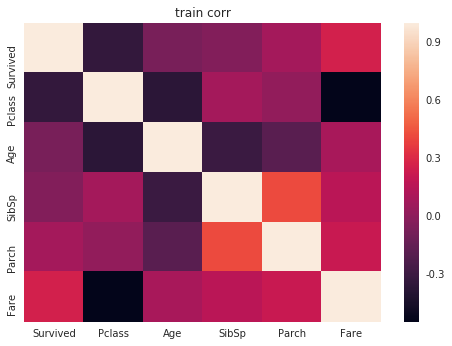

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


In [204]:
#Correlation among variables#
data=titanic[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex']]
data=data.corr()
sns.heatmap(data)
plt.title('train corr')
plt.show()                   
print(data)

In [205]:
titanic.info() #check missing values#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [206]:
titanic[titanic['Embarked'].isnull()] #check other information of passengers whoes embarked lost#

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


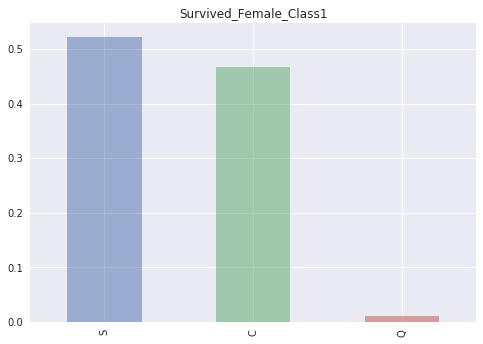

In [207]:
titanic.Embarked[(titanic.Sex=='female')&(titanic.Pclass==1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title('Survived_Female_Class1')
plt.show()
#the plot shows that s has highest probability#

In [208]:
#missing value replacement#
#Embarked---replace missing value. the above two passengers have some common features:female,survived,class1#
titanic[titanic['Embarked'].isnull()]
titanic.Embarked[titanic.Embarked.isnull()]=titanic['Embarked'].fillna('S')

In [209]:
#Cabin#
titanic[titanic['Cabin'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [210]:
#Age--replace missing value by RFR

# Get the title from the names
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v
    
# Verify that we converted everything.
print(pd.value_counts(titles))

# Add in the title column.
titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Ms            1
Mme           1
Lady          1
Sir           1
Countess      1
Capt          1
Don           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [211]:
#choose training data to predict age
age_titanic = titanic[['Age','Fare', 'Parch','SibSp','Parch','Title']] #select related variables put into the model
age_titanic_notnull = age_titanic.loc[(titanic['Age'].notnull())] # select nonnull 
age_titanic_isnull = age_titanic.loc[(titanic['Age'].isnull())]
X = age_titanic_notnull.values[:,1:] #set 'Fare', 'Parch','SibSp','Parch','Title' as X#
Y = age_titanic_notnull.values[:,0] # set the first colume 'age' as Y#

# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1) 
#n_estimators : The number of trees in the forest b.
#n_jobs: The number of jobs to run in parallel for both fit and predict.-1 means using all processors. 

RFR.fit(X,Y) #prediction
predictAges = RFR.predict(age_titanic_isnull.values[:,1:])
titanic.loc[titanic['Age'].isnull(), ['Age']]= predictAges
predictAges

array([23.98554227, 31.56896301, 32.80190016, 32.49516977, 21.41200357,
       27.95087984, 28.49195   , 26.16558983, 24.88841261, 27.95087984,
       30.75934077, 33.84878095, 26.16558983, 25.24617659, 40.304175  ,
       36.54911793,  5.48128398, 27.95087984, 30.75934077, 21.87120009,
       30.75934077, 30.75934077, 27.95087984, 29.82822722, 26.08569033,
       30.75934077, 42.26308963,  5.411125  , 28.248     , 30.55240213,
       25.84425327,  8.12935349, 42.11785   , 41.56071706,  5.81340802,
       15.67349484, 29.61720614, 58.9378    , 30.72      , 42.26308963,
       26.16558983, 15.77243333, 34.02379124, 27.95087984,  6.83477817,
       21.47436304, 17.38605735, 23.59382401, 30.55240213, 51.51073333,
       42.26308963, 26.16558983, 43.1745    , 26.16558983, 34.6381874 ,
       40.10274541, 36.54911793, 41.90455   , 26.16558983, 24.41542976,
       26.48472947, 30.75934077, 29.12014048, 15.77243333, 22.472625  ,
       25.32643333, 27.95087984, 27.3939    , 59.49405238, 32.49

In [212]:
titanic.info() #check whether imputation is successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [213]:
print(titanic["Sex"].unique()) # view

titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

print(titanic["Sex"].unique()) # check

['male' 'female']
[0 1]


In [214]:
# Replace Embarked label "S" with 0, "C" with 1, "Q" with 2

print(titanic["Embarked"].unique())

titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

print(titanic["Embarked"].unique())

['S' 'C' 'Q']
[0 1 2]


In [215]:
type(titanic)

pandas.core.frame.DataFrame

In [216]:
# Prepare to test
    # Preprocess the testing datasets (just as what we did previously)
titanic_test = pd.read_csv("/Users/liliang/Desktop/machine learning/Titanic/test.csv")
# titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())

# Get all the titles and print how often each one occurs.
titles = titanic_test["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Dona":8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v
    
# Verify that we converted everything.
print(pd.value_counts(titles))

# Add in the title column.
titanic_test["Title"] = titles

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Name, dtype: int64
1    240
2     79
3     72
4     21
7      2
6      2
8      1
5      1
Name: Name, dtype: int64


In [217]:
#Test set--missing value#
#Fare#
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1


In [218]:
fare=titanic_test[(titanic_test['Embarked'] == "S") & (titanic_test['Pclass'] == 3)].Fare.median()
titanic_test['Fare']=titanic_test['Fare'].fillna(fare)

In [219]:
#Embarked#
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

In [220]:


#choose testing data to predict age
age_test = titanic_test[['Age','Fare', 'Parch','SibSp','Parch','Title']]

age_test_notnull = age_test[age_test['Age'].notnull()]
age_test_isnull = age_test[(age_test['Age'].isnull())]

X = age_test_notnull.values[:,1:]
Y = age_test_notnull.values[:,0]


# use RandomForestRegression to test data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predict_test_Ages = RFR.predict(age_test_isnull.values[:,1:])
titanic_test.loc[titanic_test['Age'].isnull(), ['Age']]= predict_test_Ages
predict_test_Ages

array([27.70127107, 46.35161667, 29.33769881, 29.04616333, 21.67686636,
       39.3478    , 39.01894881, 20.89811291, 38.4695    , 35.59832857,
       27.01831667, 31.39223858, 27.70127107, 25.83209481, 26.80908333,
       29.87935198, 25.12390016, 31.39223858, 20.89811291, 20.89811291,
       22.67928866, 23.67034986, 25.59897935, 21.06932244, 20.89811291,
       25.70265   , 41.69072246, 24.56714365, 43.851     , 39.01894881,
       27.70127107, 20.07620437, 27.11738562, 50.23901667, 26.22791667,
       22.11553293, 20.89811291, 19.95791333, 38.00247386, 27.33937923,
       20.7721    , 38.9933284 , 24.51238562, 22.53032976, 31.39223858,
       32.34332   , 29.87935198, 26.30003101, 26.30003101,  8.00793667,
       35.9755    , 26.22791667, 20.89811291, 27.70127107, 39.36616796,
       26.22791667, 21.67686636, 20.89811291, 23.44133333, 23.10008374,
       29.87935198, 31.57102024, 22.11553293, 31.39223858, 39.78416667,
       22.11553293, 29.33769881, 37.59016667, 29.87935198, 29.55

In [221]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [222]:
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [223]:
print(titanic_test["Sex"].unique()) # view

titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1

print(titanic_test["Sex"].unique()) # check

['male' 'female']
[0 1]


## Feature Engineering

In [224]:
full_dataset = [titanic, titanic_test]

In [225]:
# Generating age group
for dataset in full_dataset:    
    dataset.loc[dataset["Age"] <= 14, "AgeC"] = 0
    dataset.loc[(dataset["Age"] > 14) & (dataset["Age"] <= 34), "AgeC"] = 1
    dataset.loc[(dataset["Age"] > 34) & (dataset["Age"] <= 53), "AgeC"] = 2
    dataset.loc[dataset["Age"] > 53, "AgeC"] = 3
    
# Generating familysize
for dataset in full_dataset:  
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"]

# Generating traveling alone
for dataset in full_dataset:   
    dataset["Alone"] = 0
    dataset.loc[dataset["FamilySize"] == 0, "Alone"] = 1

# Get the title from the names
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 4, "Major": 4, "Col": 4, "Mlle": 4, "Mme": 4, "Don": 4,"Dona": 4, "Lady": 4, "Countess": 4, "Jonkheer": 4, "Sir": 4, "Capt": 4, "Ms": 4}
    
# Generating Title
for dataset in full_dataset: 
    dataset["Title"] = dataset["Name"].apply(get_title)
    for k,v in title_mapping.items():
        dataset.loc[dataset["Title"] == k, "Title"] = v
          
# Generating Name Length
for dataset in full_dataset: 
    dataset["NameLength"] = dataset["Name"].apply(lambda x: len(x))

In [226]:
data=['']

In [227]:
# Generating Price Range
for dataset in full_dataset:    
    dataset.loc[dataset["Fare"] <= 7.9, "FareC"] = 0
    dataset.loc[(dataset["Fare"] > 7.9) & (dataset["Fare"] <= 14.5), "FareC"] = 1
    dataset.loc[(dataset["Fare"] > 14.5) & (dataset["Fare"] <= 31), "FareC"] = 2
    dataset.loc[dataset["Fare"] > 31, "FareC"] = 3

In [228]:
dataset["FareC"] = dataset["FareC"].astype('int')

In [229]:
# Generating Has Cabin
for dataset in full_dataset:
    dataset["NoCabin"] = pd.isna(dataset["Cabin"])

# Generating Position
# Map each Position to an integer.
position_mapping = {"0": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}

In [230]:
for dataset in full_dataset:
    dataset["Position"] = dataset["Cabin"].str[0]
    dataset["Position"].fillna("0", inplace=True) 
    dataset["Position"] = [position_mapping[x] for x in dataset["Position"].astype(str) if x in position_mapping]

In [231]:
# Generating Pair
def NumberFromStrings(string):
    numberfromstring = re.findall('\d+',string)
    if numberfromstring == []:
        return int(0)
    else:
        return int(numberfromstring[0])

# This method considers cabin without numbers, f.ex. "F", as being even number rooms.
for dataset in full_dataset: 
    dataset["Pair"] = dataset["Cabin"].astype(str)
    dataset["Pair"] = dataset["Pair"].apply(NumberFromStrings)
    dataset["Pair"] = dataset["Pair"] % 2
    dataset.loc[pd.isna(dataset["Cabin"]), "Pair"] = 2

In [232]:
titanic.Position.unique()

array([0, 3, 5, 7, 4, 1, 2, 6, 8])

In [233]:
df = pd.DataFrame({'col2': {0: 'a', 1: 2, 2: np.nan}, 'col1': {0: 'w', 1: 'A', 2: 'B'}})
di = {"B": 2, "A": 1}
print(df)
print(df.replace({"col1": di}))


  col2 col1
0    a    w
1    2    A
2  NaN    B
  col2 col1
0    a    w
1    2    1
2  NaN    2


In [234]:
titanic.drop(['PassengerId','Name', 'Ticket','Cabin'],axis=1,inplace=True)

In [237]:
#scale the data#
titanic['Fare'] = StandardScaler().fit_transform(titanic.filter(['Fare']))
titanic['Age'] = StandardScaler().fit_transform(titanic.filter(['Age']))
titanic['NameLength'] = StandardScaler().fit_transform(titanic.filter(['NameLength']))
titanic_test['Fare'] = StandardScaler().fit_transform(titanic_test.filter(['Fare']))
titanic_test['Age'] = StandardScaler().fit_transform(titanic_test.filter(['Age']))
titanic_test['NameLength'] = StandardScaler().fit_transform(titanic_test.filter(['NameLength']))


In [238]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeC,FamilySize,Alone,NameLength,FareC,NoCabin,Position,Pair
0,0,3,0,-0.559472,1,0,-0.502445,0,0,1.0,1,0,-0.427451,0.0,True,0,2
1,1,1,1,0.609661,1,0,0.786845,1,2,2.0,1,0,2.590962,3.0,False,3,1
2,1,3,1,-0.267189,0,0,-0.488854,0,1,1.0,0,1,-0.535252,1.0,True,0,2
3,1,1,1,0.390449,1,0,0.420730,0,2,2.0,1,0,1.836359,3.0,False,3,1
4,0,3,0,0.390449,0,0,-0.486337,0,0,2.0,0,1,-0.319651,1.0,True,0,2
5,0,3,0,-0.414387,0,0,-0.478116,2,0,1.0,0,1,-1.182055,1.0,True,0,2
6,0,1,0,1.778795,0,0,0.395814,0,0,3.0,0,1,-0.427451,3.0,False,5,0
7,0,3,0,-2.020890,3,1,-0.224083,0,3,0.0,4,0,0.327152,2.0,True,0,2
8,1,3,1,-0.194118,0,2,-0.424256,0,2,1.0,2,0,2.375361,1.0,True,0,2
9,1,2,1,-1.144039,1,0,-0.042956,1,2,0.0,1,0,0.866154,2.0,True,0,2


In [239]:
titanic_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeC,FamilySize,Alone,NameLength,FareC,NoCabin,Position,Pair
0,3,0,0.356955,0,0,-0.497079,2,0,2.0,0,1,-1.153019,0,True,0,2
1,3,1,1.306757,1,0,-0.511942,0,2,2.0,1,0,0.453521,0,True,0,2
2,2,0,2.446521,0,0,-0.463770,2,0,3.0,0,1,-0.249340,1,True,0,2
3,3,0,-0.212927,0,0,-0.482143,0,0,1.0,0,1,-1.153019,1,True,0,2
4,3,1,-0.592848,1,1,-0.417167,0,2,1.0,2,0,1.658426,1,True,0,2
5,3,0,-1.200721,0,0,-0.472060,0,0,0.0,0,1,-0.148932,1,True,0,2
6,3,1,0.015026,0,0,-0.500664,2,1,1.0,0,1,-0.751384,0,True,0,2
7,2,0,-0.288911,1,1,-0.117606,0,0,1.0,2,0,0.051886,2,True,0,2
8,3,1,-0.896785,0,0,-0.507834,1,2,1.0,0,1,1.357199,0,True,0,2
9,3,0,-0.668832,2,0,-0.204539,0,0,1.0,2,0,-0.450158,2,True,0,2


In [240]:
titanic.to_csv('/Users/liliang/Desktop/machine learning/Titanic/titanic_train_scaled.csv')
titanic_test.to_csv('/Users/liliang/Desktop/machine learning/Titanic/titanic_test_scaled.csv')